# Homework 5 - Gender Differences in University Enrollment

The objective of this homework is to practice visualizing data. To successfully complete this homework, you may use any resources available to you. 

Get the `universities.csv` data. This is data from the [National Center for Education Statistics](https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx). Develop **three** plots:

In [222]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [223]:
import numpy as np
import pandas as pd

In [224]:
c = students = pd.read_csv('universities.csv')

In [225]:
pd.options.display.float_format = '{:.2f}'.format

In [226]:
import seaborn as sn
%matplotlib inline

In [227]:
uswest = ['AK','AZ','CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

A boxplot of the average number of total enrollment for the states in the U.S. West
    * The States in the U.S. West are
        * Alaska
        * Arizona
        * California
        * Colorado
        * Hawaii
        * Idaho
        * Montana
        * Nevada
        * New Mexico
        * Oregon
        * Utah
        * Washington
        * Wyoming (see prepared list `uswest`)
    * Order the plot based on the number of institutions in the state

STABBR
AK     10
WY     11
HI     26
MT     32
ID     43
NV     46
NM     51
UT     79
OR     96
WA    129
CO    130
AZ    137
CA    754
Name: UNITID, dtype: int64

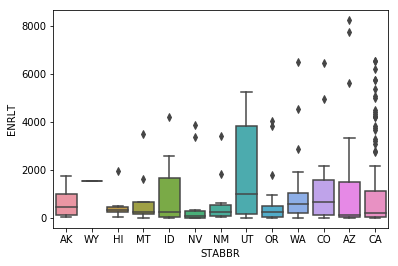

In [256]:
# Slice the data for west only
west=c[(c['STABBR']=='AK')| (c['STABBR']=='AZ')|(c['STABBR']=='CA')| (c['STABBR']== 'CO')| (c['STABBR']=='HI')| (c['STABBR']=='ID')|(c['STABBR']=='MT')|(c['STABBR']=='NV')|(c['STABBR']=='NM')|(c['STABBR']=='OR')| (c['STABBR']=='UT')| (c['STABBR']=='WA')| (c['STABBR']=='WY')]

# Sort state based on the number of institutions
insti=west.groupby('STABBR')['UNITID'].count().sort_values()
insti

# Generate boxplot
order = insti.index
p = sn.boxplot(x='STABBR', y='ENRLT', order=order, data=west)

A boxplot of the average number of enrollment per gender category (hue) and state in the U.S. West
    * Please notice that enrollment numbers for men and women are in two separate columns.
    * Hue requires one column, which means you have to 'melt' the dataset ([Link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)).
    * The results should be a dataframe with two rows (one for men, one for women) for each university

,UNITID,INSTNM,ZIP,STABBR,Gender,Enrollment
0,102553,University of Alaska Anchorage,99508,AK,ENRLM,776.00
1544,102553,University of Alaska Anchorage,99508,AK,ENRLW,968.00


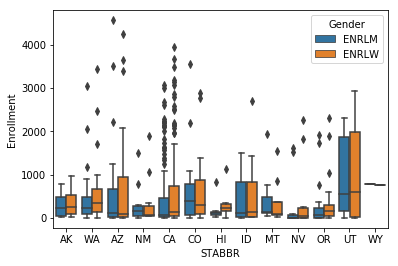

In [334]:
# Melt dataframe
g=pd.melt(west, id_vars=['UNITID','INSTNM','ZIP','STABBR'], value_vars=['ENRLM', 'ENRLW'], var_name='Gender',value_name='Enrollment')

# Double check whether there are two rows for each university
g[g['UNITID']==102553]

# Deliver boxplot
p2 = sn.boxplot(x='STABBR', y='Enrollment', hue='Gender', data=g)

 A ordered barplot of the ratio of admissions for men and women for universities in the Bay Area
    * We assume that the Bay Area is characterized with zip codes that start with `950` and `94`
    * Focus on institutions with more than 1,000 enrollments.
    * Develop the ratio of admissions for women and for men. Standardize this ratio on the mean. 

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,UNITID,INSTNM,ZIP,STABBR,ENRLT,ENRLM,ENRLW,ADMSSNW,ADMSSNM,RATIO
4247,243744,Stanford University,94305,CA,1739.00,854.00,885.00,1087.00,1031.00,-0.48
246,110635,University of California-Berkeley,94720,CA,6182.00,2997.00,3185.00,7766.00,6209.00,-0.29
254,110714,University of California-Santa Cruz,95064-1011,CA,4221.00,2149.00,2072.00,15883.00,12569.00,-0.27
505,122931,Santa Clara University,95053,CA,1317.00,650.00,667.00,4271.00,3377.00,-0.27
490,122597,San Francisco State University,94132,CA,3642.00,1483.00,2159.00,15688.00,9016.00,0.20
241,110574,California State University-East Bay,94542,CA,1596.00,588.00,1008.00,7039.00,3891.00,0.27
524,123572,Sonoma State University,94928-3609,CA,1806.00,629.00,1177.00,8307.00,4268.00,0.41
492,122612,University of San Francisco,94117-1080,CA,1587.00,576.00,1011.00,7245.00,3666.00,0.44


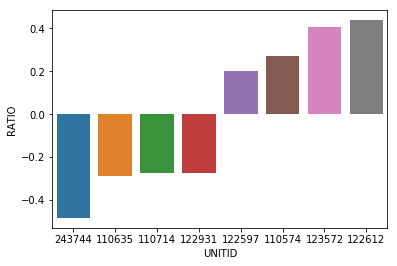

In [346]:
# Slice dataframe for Bay Area and institutions with more than 1,000 enrollments
c1=c[(c['ZIP'].str.startswith('950')) | (c['ZIP'].str.startswith('94')) & (c['STABBR']=='CA') & (c['ENRLT']>1000)]

# Develop the ratio of admissions for women and for men
c1['RATIO']=c1['ADMSSNW']/c1['ADMSSNM']
# Clean data
c2=c1.dropna()
# Standardize 'RATIO' column
c2['RATIO']=c2['RATIO']-c2['RATIO'].mean()
# Order by 'RATIO'
c3=c2.sort_values('RATIO')
c3

# Generate the ordered barplot
sn.barplot(x='UNITID', y='RATIO', order= c3.UNITID, data=c3)

Interpret you plots in terms of gender differences. 

Answer:
    
    According to the second plot, we can find that woman enrollment number is normally higher than men in west, except 'NM' and 'CO'. 
    
    As for the third one, we can interpret it as the standard deviation of ratio of admission woman to admission man based on universities in Bay Area, and from that we can see the discrete level of this data and this dataset is quite stable which means women admission is normally higher than that of man in Bay Area universities.